In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline 

In [41]:
df = pd.read_csv("updated_pollution_dataset_2.csv")
print(df.head())


   Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
1         26.5      70.7    6.9  16.0  21.9   5.6  1.01   
2         39.4      96.6   14.6  35.5  42.9  17.9  1.82   
3         41.7      82.5    1.7  15.8  31.1  12.7  1.80   
4         29.4      93.8   10.3  22.7  45.1  11.8  2.03   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                           11.1                 551        Good  
1                           12.7                 303        Good  
2                            3.1                 674        Poor  
3                            4.6                 735        Poor  
4                            5.4                 486        Poor  


In [42]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    4250 non-null   float64
 1   Humidity                       4250 non-null   float64
 2   PM2.5                          4250 non-null   float64
 3   PM10                           4250 non-null   float64
 4   NO2                            4250 non-null   float64
 5   SO2                            4250 non-null   float64
 6   CO                             4250 non-null   float64
 7   Proximity_to_Industrial_Areas  4250 non-null   float64
 8   Population_Density             4250 non-null   int64  
 9   Air Quality                    4250 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 332.2+ KB


In [43]:
df.shape      # Tells  quantity of records in each column, whether the data is null or not, the type of data, and the dataset’s memory use.

(4250, 10)

In [44]:
df.describe()  #gives decsription of the data

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,30.021671,69.935576,20.057929,30.151482,26.399671,10.004471,1.500428,8.684212,497.283059
std,7.079486,16.402863,25.140063,28.294709,9.415399,7.111211,0.586232,3.778317,158.671435
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,24.700000,57.800000,4.500000,11.700000,19.500000,4.900000,1.010000,5.225000,376.000000
50%,28.700000,69.600000,11.600000,21.200000,25.000000,7.500000,1.310000,9.700000,494.000000
75%,34.500000,80.200000,25.600000,37.800000,32.500000,14.175000,1.930000,11.300000,601.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


In [45]:
#column to list for clarity
df.columns.tolist()

['Temperature',
 'Humidity',
 'PM2.5',
 'PM10',
 'NO2',
 'SO2',
 'CO',
 'Proximity_to_Industrial_Areas',
 'Population_Density',
 'Air Quality']

In [46]:
df.isnull().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

In [47]:
#checking unique values in dataset 
df.nunique()

Temperature                      362
Humidity                         722
PM2.5                            777
PM10                             915
NO2                              445
SO2                              346
CO                               265
Proximity_to_Industrial_Areas    179
Population_Density               683
Air Quality                        2
dtype: int64

In [48]:
df.dtypes

Temperature                      float64
Humidity                         float64
PM2.5                            float64
PM10                             float64
NO2                              float64
SO2                              float64
CO                               float64
Proximity_to_Industrial_Areas    float64
Population_Density                 int64
Air Quality                       object
dtype: object

In [49]:
columns = ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density']

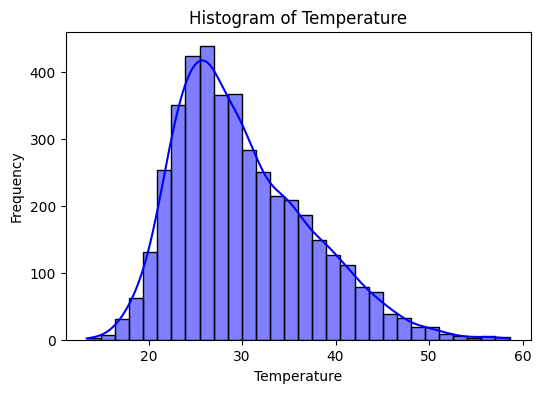

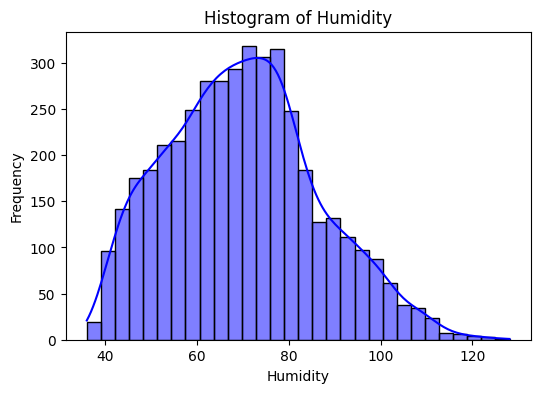

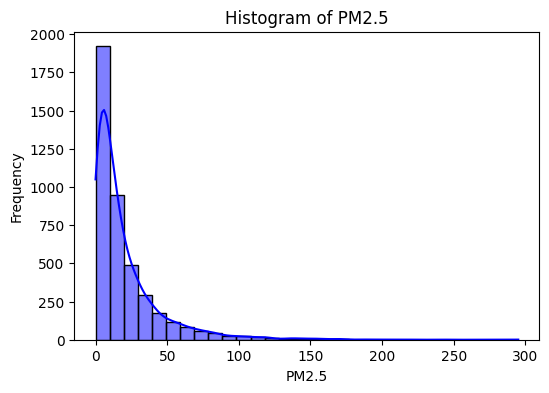

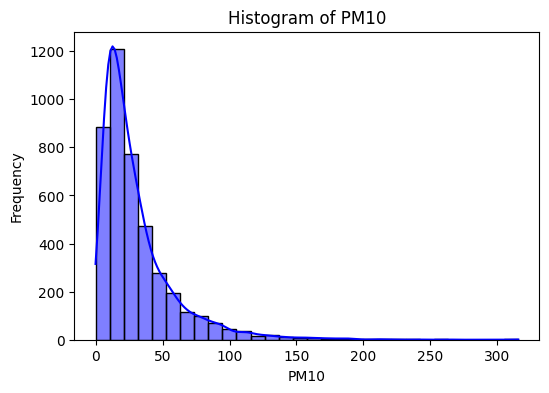

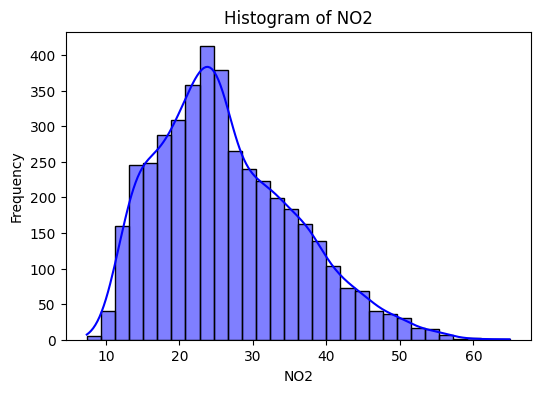

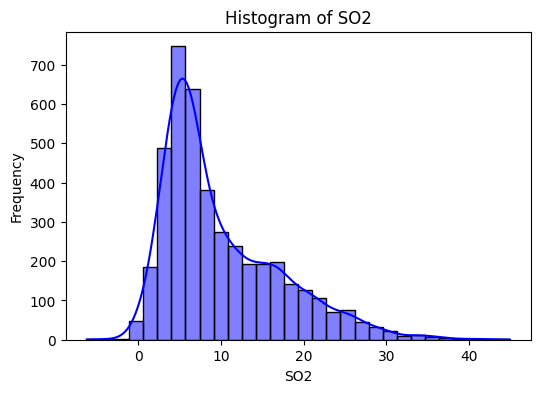

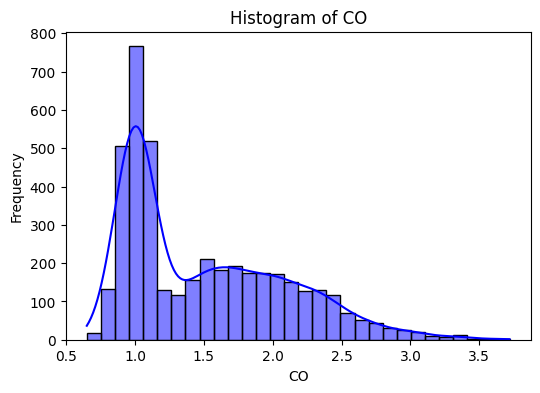

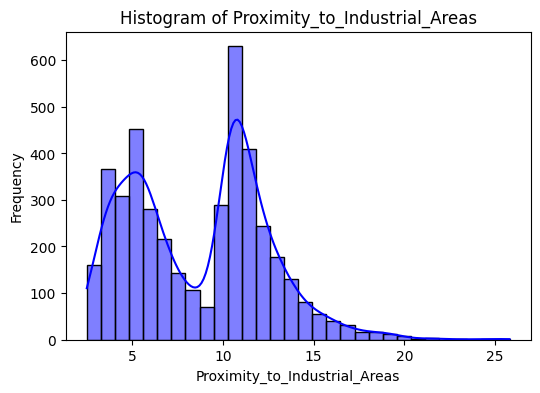

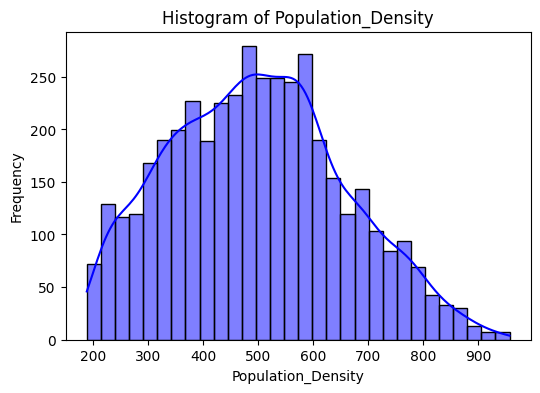

In [50]:
# DATA VISUALISATION 1. **Histogram (Univariate Analysis)**: Distribution of each column
for col in columns:
   plt.figure(figsize=(6, 4))
   sns.histplot(df[col], kde=True, bins=30, color="blue")
   plt.title(f"Histogram of {col}")
   plt.xlabel(col)
   plt.ylabel("Frequency")
   plt.show()

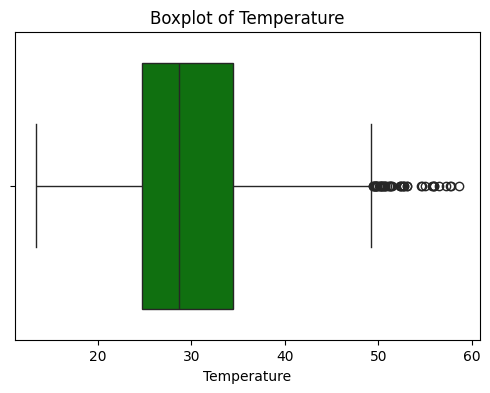

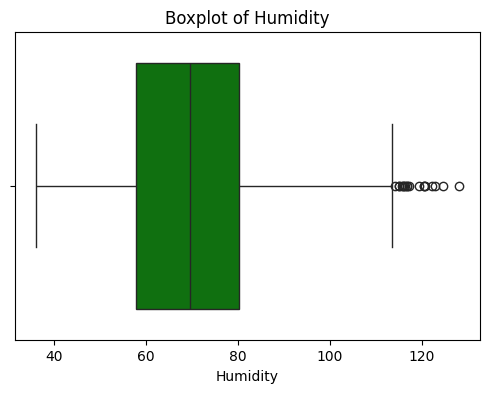

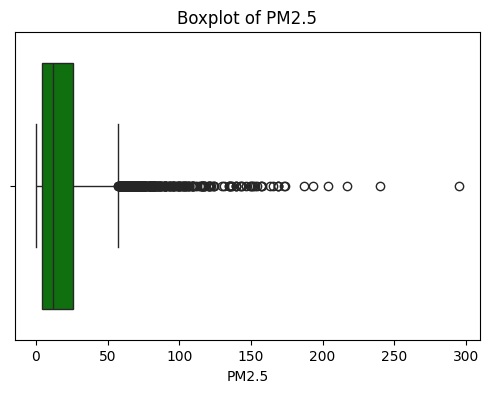

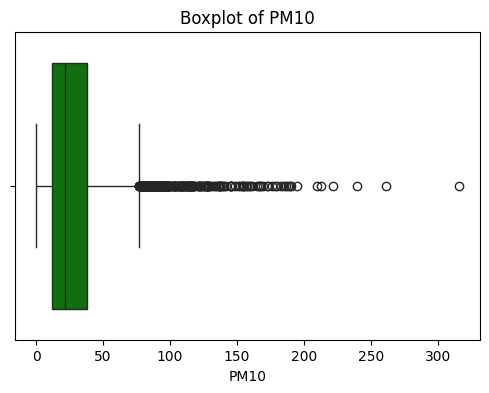

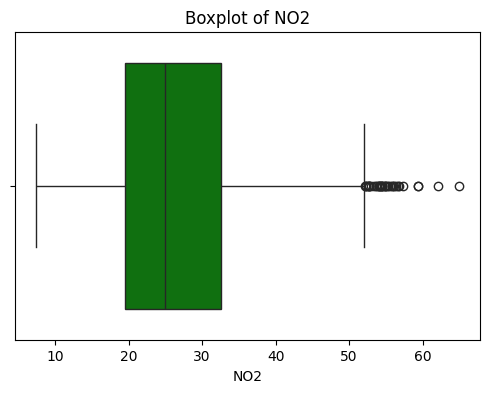

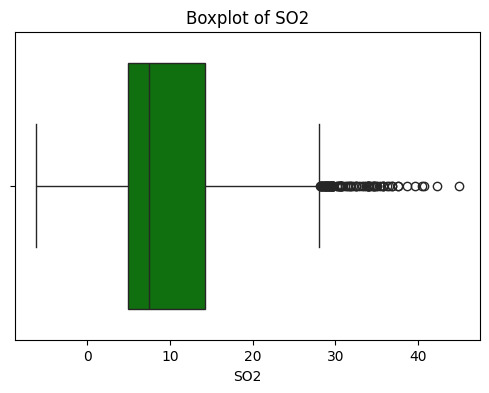

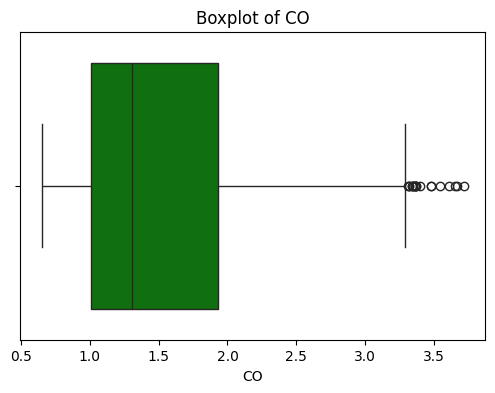

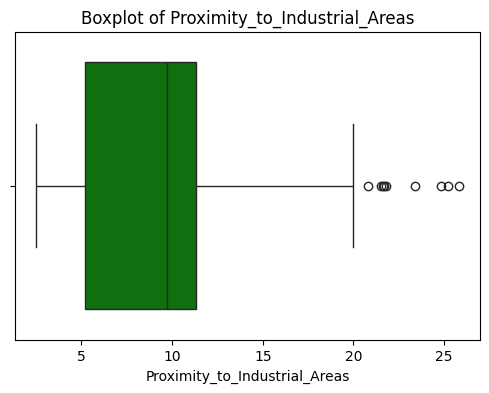

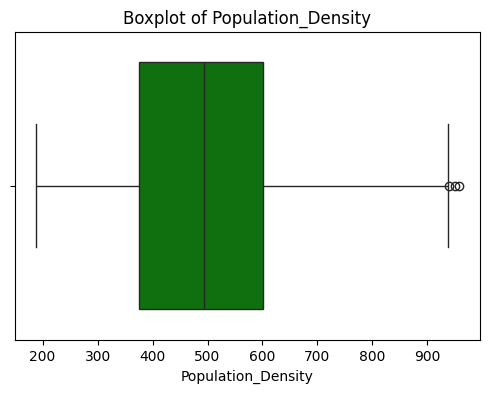

In [51]:
#2 **Boxplot (Outlier Detection)**: Checking outliers for each column
for col in columns:
   plt.figure(figsize=(6, 4))
   sns.boxplot(x=df[col], color="green")
   plt.title(f"Boxplot of {col}")
   plt.xlabel(col)
   plt.show()

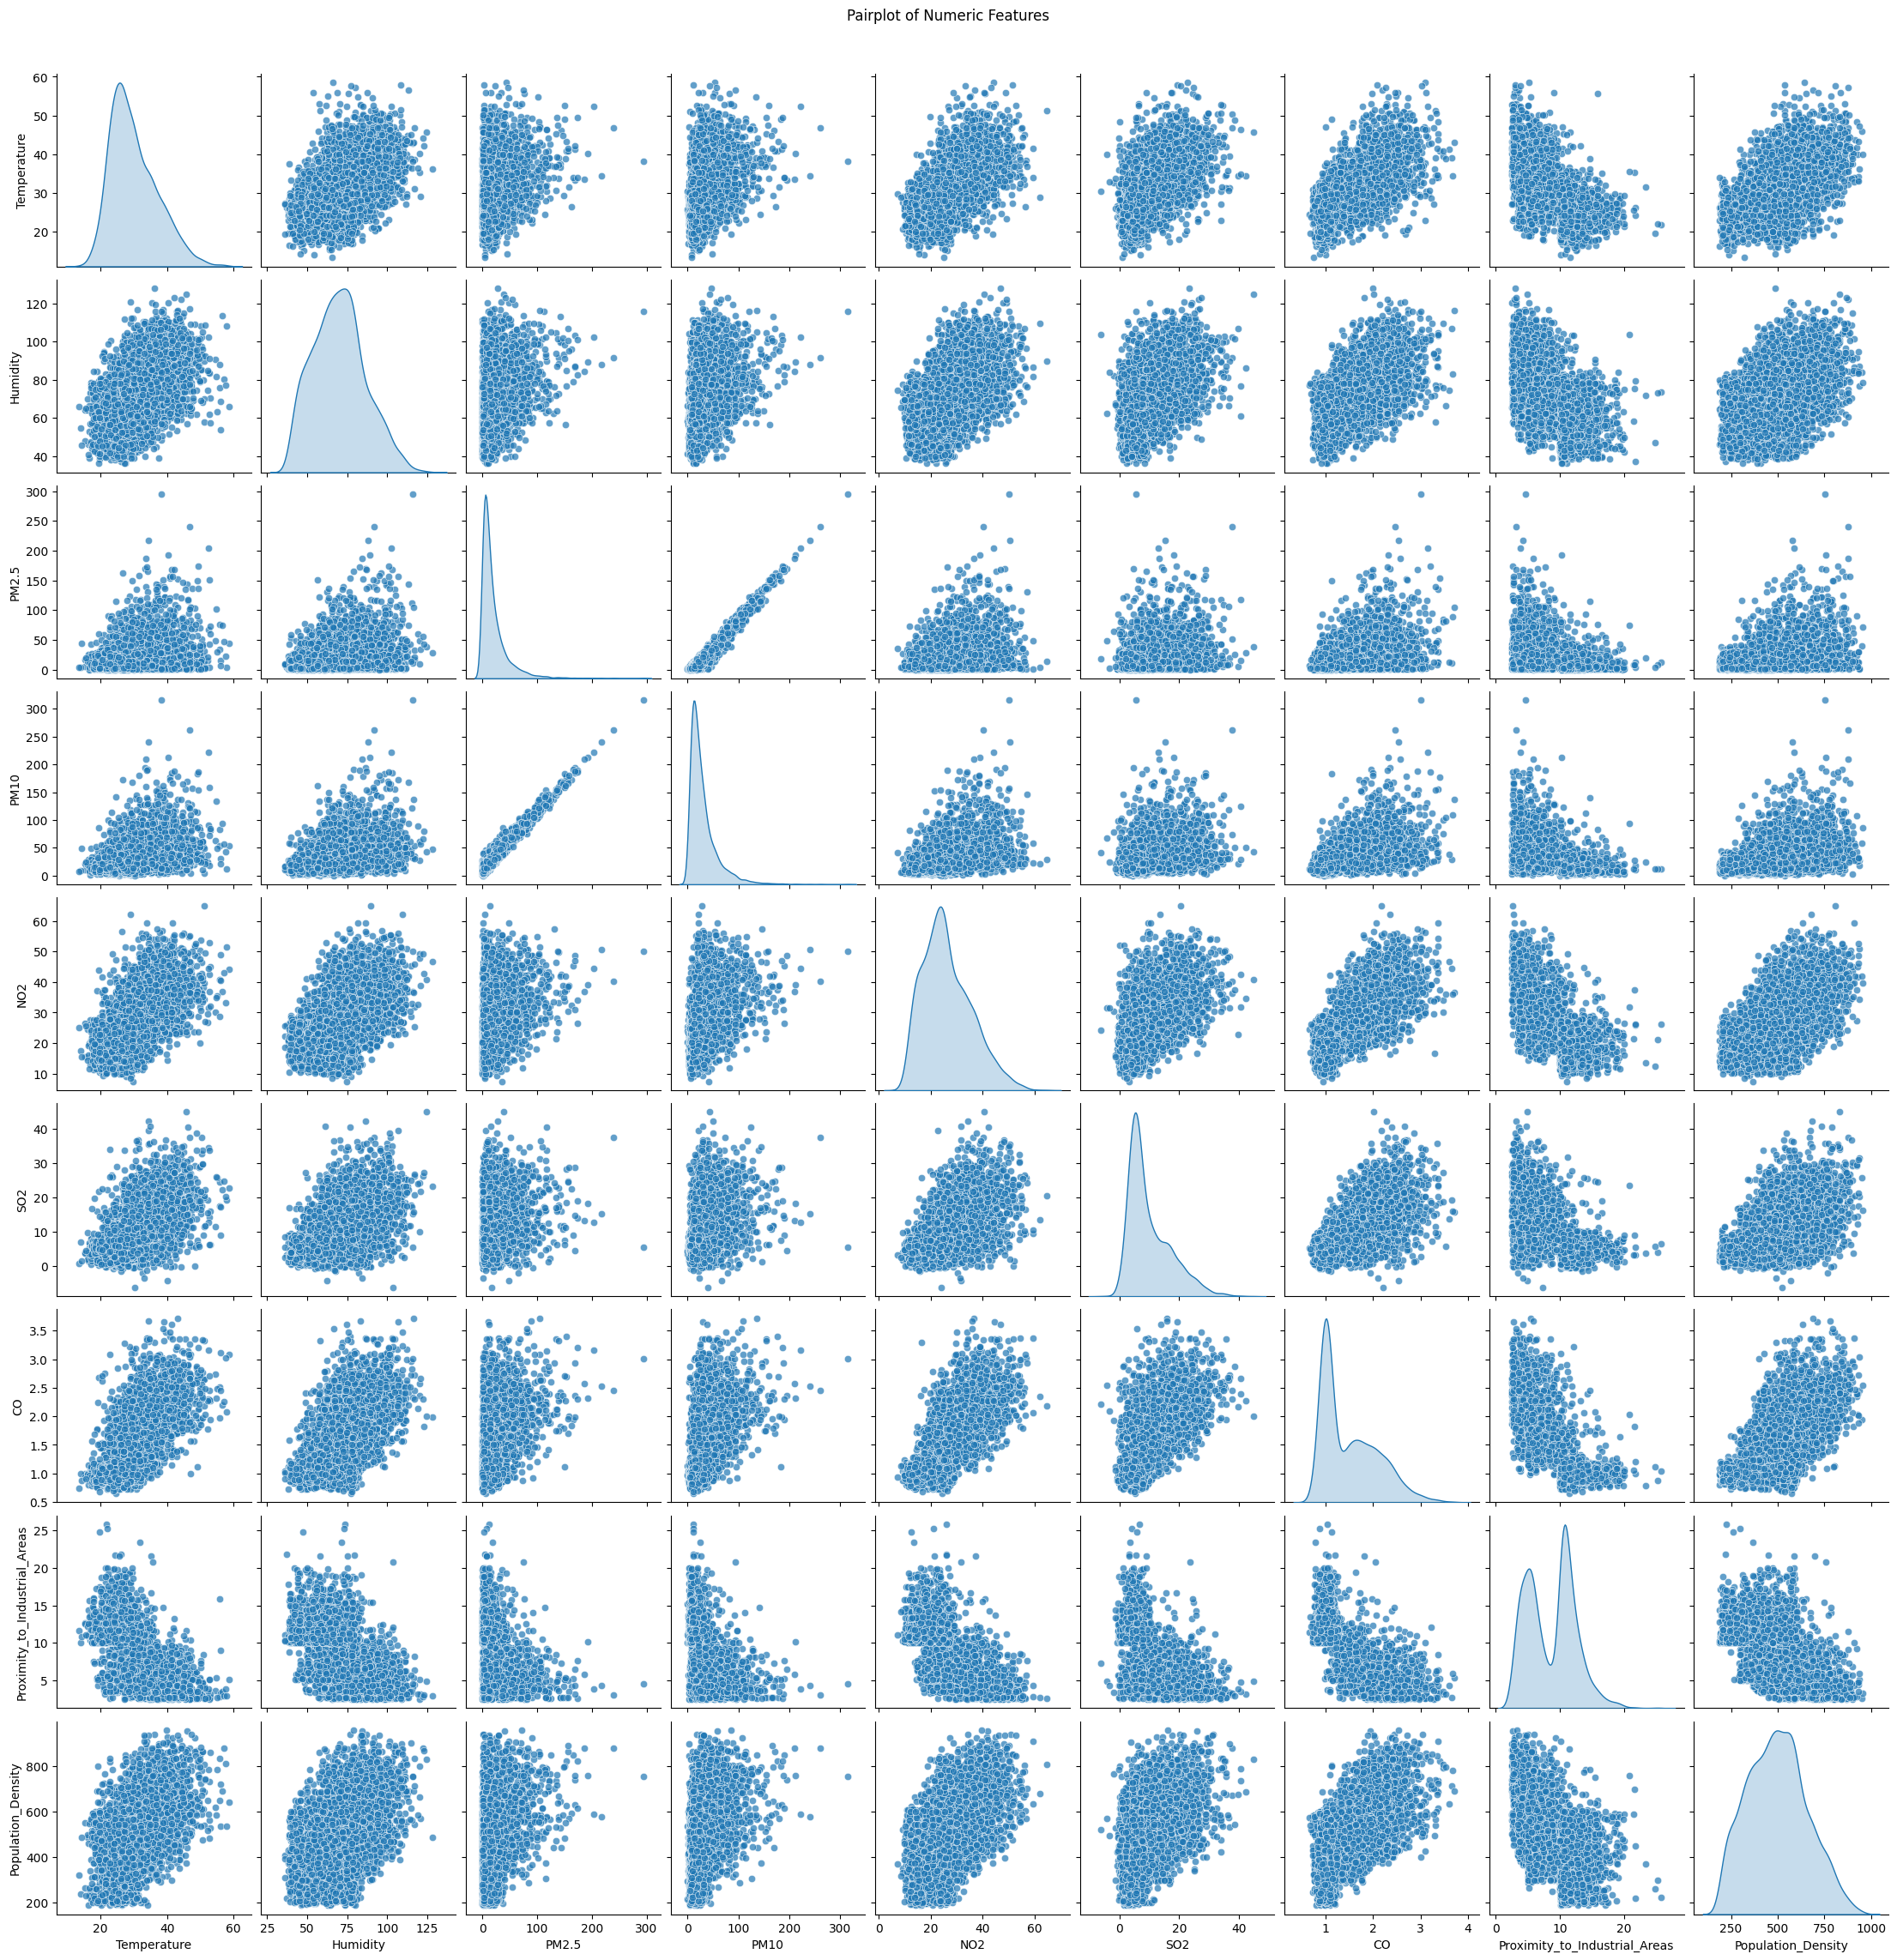

In [52]:
# 3. **Pairplot (Pairwise Relationship)**: Relationships among all numeric features
sns.pairplot(df[columns], diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

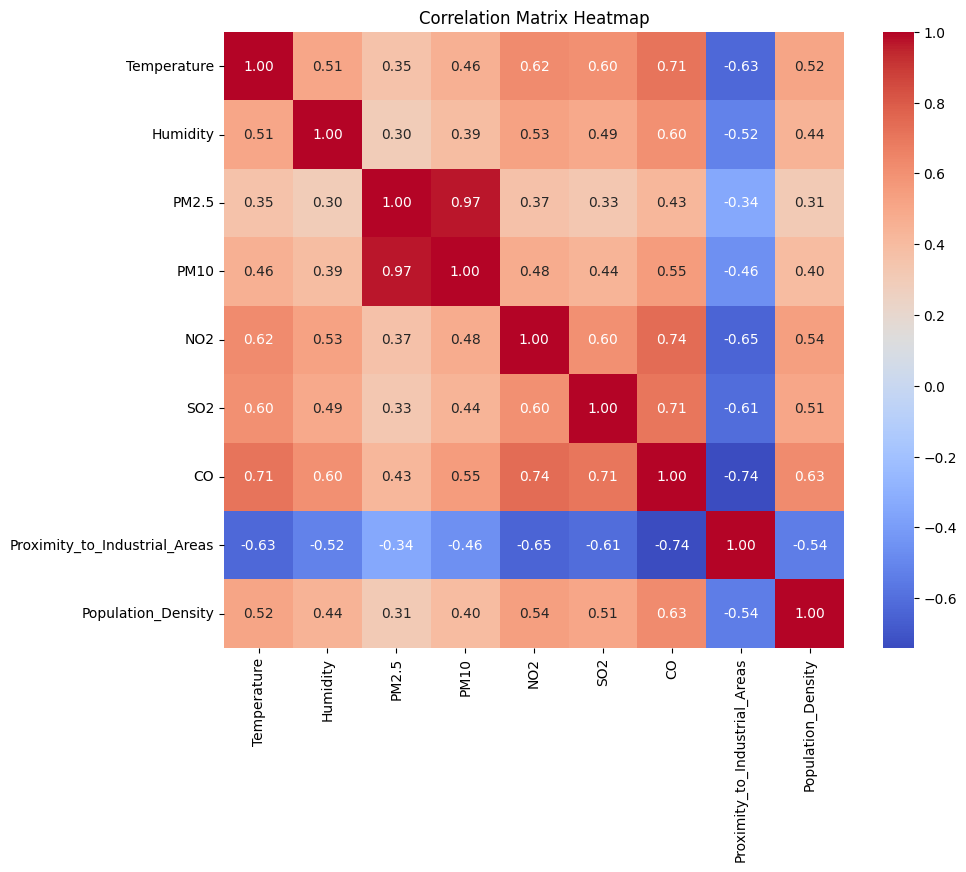

In [53]:
# 4. **Heatmap (Correlation Matrix)**: Relationships between all variables
correlation_matrix = df[columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


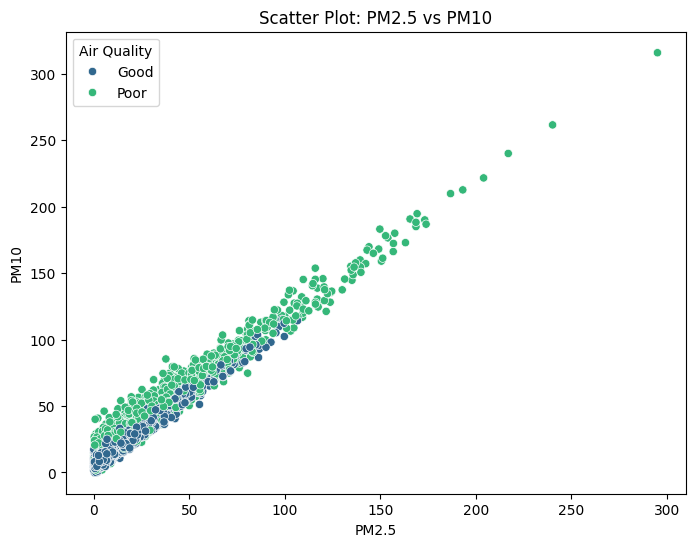

In [54]:
# 5. **Scatter Plot (Bivariate Analysis)**: Example - PM2.5 vs PM10
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PM2.5', y='PM10', data=df, hue='Air Quality', palette='viridis')
plt.title("Scatter Plot: PM2.5 vs PM10")
plt.xlabel("PM2.5")
plt.ylabel("PM10")
plt.show()

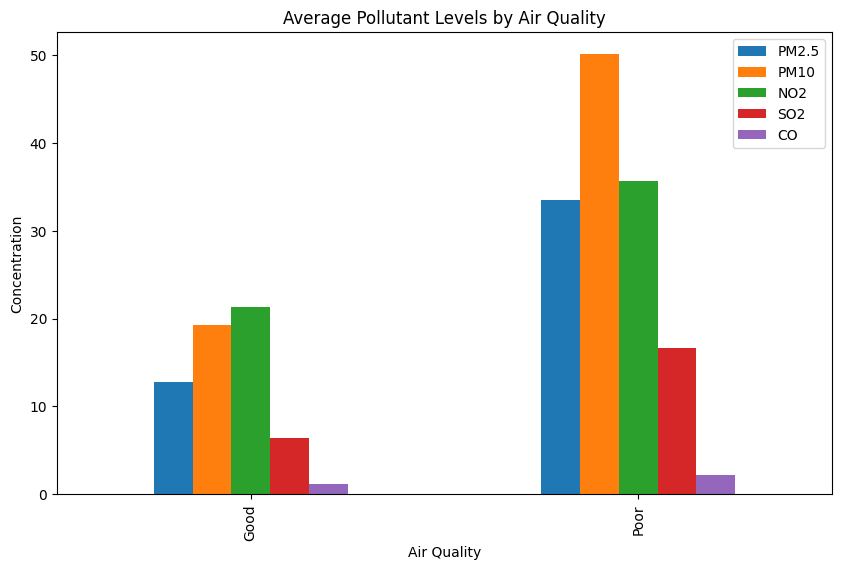

In [55]:
# 6. **Bar Plot**: Average pollutant levels grouped by Air Quality
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO']
mean_values = df.groupby('Air Quality')[pollutants].mean()
mean_values.plot(kind='bar', figsize=(10, 6))
plt.title("Average Pollutant Levels by Air Quality")
plt.ylabel("Concentration")
plt.xlabel("Air Quality")
plt.show()

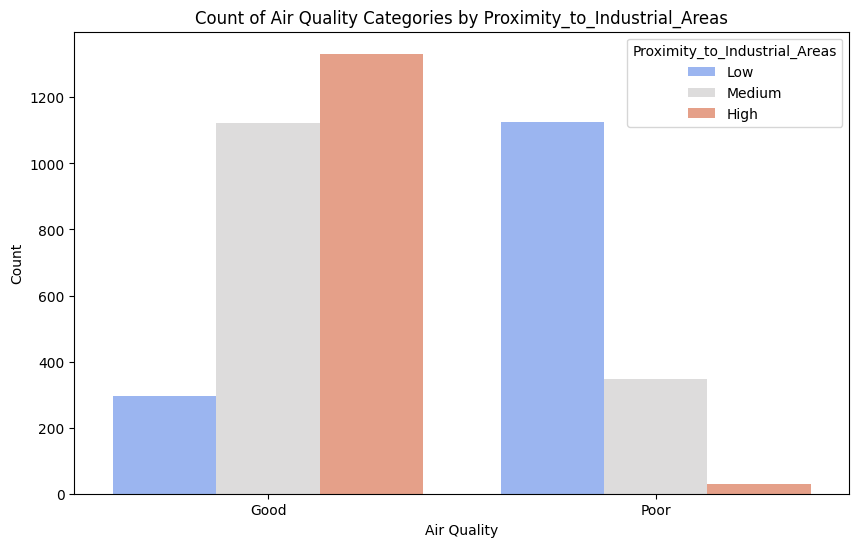

In [56]:
# Grouped count plot by Air Quality and Proximity range

df['Proximity_to_Industrial_Areas'] = pd.qcut(df['Proximity_to_Industrial_Areas'], q=3, labels=['Low', 'Medium', 'High'])
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Air Quality', hue='Proximity_to_Industrial_Areas', palette='coolwarm')
plt.title("Count of Air Quality Categories by Proximity_to_Industrial_Areas")
plt.xlabel("Air Quality")
plt.ylabel("Count")
plt.legend(title="Proximity_to_Industrial_Areas")
plt.show()

In [57]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
le = LabelEncoder()
# Fit and transform the 'Proximity_to_Industrial_Areas' column
df['Proximity_to_Industrial_Areas'] = le.fit_transform(df['Proximity_to_Industrial_Areas'])

In [58]:
# Replace zero values with a small constant to avoid division by zero
df['PM10'].replace(0, 1e-5, inplace=True)
df['SO2'].replace(0, 1e-5, inplace=True)
# Create new features safely
df['PM2.5_to_PM10'] = df['PM2.5'] / df['PM10']
df['NO2_to_SO2'] = df['NO2'] / df['SO2']
# Check for zero replacements and feature creation
print(df[['PM2.5', 'PM10', 'PM2.5_to_PM10', 'NO2', 'SO2', 'NO2_to_SO2']].head())

   PM2.5  PM10  PM2.5_to_PM10   NO2   SO2  NO2_to_SO2
0    6.1   6.3       0.968254  13.5   5.3    2.547170
1    6.9  16.0       0.431250  21.9   5.6    3.910714
2   14.6  35.5       0.411268  42.9  17.9    2.396648
3    1.7  15.8       0.107595  31.1  12.7    2.448819
4   10.3  22.7       0.453744  45.1  11.8    3.822034


C:\Users\338554\AppData\Local\Temp\ipykernel_17108\715007582.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PM10'].replace(0, 1e-5, inplace=True)
C:\Users\338554\AppData\Local\Temp\ipykernel_17108\715007582.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [59]:
#Combined Pollutant Index
df['Total_Pollutants'] = df['PM2.5'] + df['PM10'] + df['NO2'] + df['SO2'] + df['CO']
#Create a column like this

In [60]:
#-Humidity Index
df['Temperature_Humidity_Index'] = df['Temperature'] * df['Humidity']
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality,PM2.5_to_PM10,NO2_to_SO2,Total_Pollutants,Temperature_Humidity_Index
0,27.1,39.1,6.1,6.3,13.5,5.3,1.15,0,551,Good,0.968254,2.547170,32.35,1059.61
1,26.5,70.7,6.9,16.0,21.9,5.6,1.01,0,303,Good,0.431250,3.910714,51.41,1873.55
2,39.4,96.6,14.6,35.5,42.9,17.9,1.82,1,674,Poor,0.411268,2.396648,112.72,3806.04
3,41.7,82.5,1.7,15.8,31.1,12.7,1.80,1,735,Poor,0.107595,2.448819,63.10,3440.25
4,29.4,93.8,10.3,22.7,45.1,11.8,2.03,1,486,Poor,0.453744,3.822034,91.93,2757.72


In [61]:
from scipy.stats import zscore

In [62]:
#calculating Zscores
zscores = df[['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Population_Density','PM2.5_to_PM10','NO2_to_SO2','Total_Pollutants','Temperature_Humidity_Index']].apply(zscore)
print(zscores.head())

   Temperature  Humidity     PM2.5      PM10       NO2       SO2        CO  \
0    -0.412744 -1.880111 -0.555272 -0.843065 -1.370222 -0.661635 -0.597834   
1    -0.497506  0.046609 -0.523446 -0.500205 -0.477962 -0.619443 -0.836676   
2     1.324875  1.625787 -0.217126  0.189051  1.752689  1.110424  0.545193   
3     1.649795  0.766080 -0.730312 -0.507274  0.499276  0.379098  0.511072   
4    -0.087823  1.455065 -0.388188 -0.263383  1.986377  0.252522  0.903455   

   Population_Density  PM2.5_to_PM10  NO2_to_SO2  Total_Pollutants  \
0            0.338582      -0.015098   -0.026414         -0.904320   
1           -1.224580      -0.015417   -0.026399         -0.595226   
2            1.113860      -0.015429   -0.026415          0.399034   
3            1.498347      -0.015609   -0.026415         -0.405650   
4           -0.071118      -0.015403   -0.026400          0.061884   

   Temperature_Humidity_Index  
0                   -1.218813  
1                   -0.315841  
2             

In [63]:
#removing outliers with zscores<3
for column in ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density']:
    df = df[(np.abs(zscore(df[column]))<3)]

In [64]:
df.shape

(3960, 14)

In [65]:
# Convert numerical columns to float32
numerical_columns = df.select_dtypes(include=['float64', 'int32', 'int64']).columns  # Select numerical columns
df[numerical_columns] = df[numerical_columns].astype('float32')
# Verify the data types
print(df.dtypes)

Temperature                      float32
Humidity                         float32
PM2.5                            float32
PM10                             float32
NO2                              float32
SO2                              float32
CO                               float32
Proximity_to_Industrial_Areas    float32
Population_Density               float32
Air Quality                       object
PM2.5_to_PM10                    float32
NO2_to_SO2                       float32
Total_Pollutants                 float32
Temperature_Humidity_Index       float32
dtype: object


In [66]:
columns = ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density','PM2.5_to_PM10','NO2_to_SO2','Total_Pollutants','Temperature_Humidity_Index']

In [67]:
#Normalisation
scaler=MinMaxScaler()
normalized_data=scaler.fit_transform(df[columns])
normalized_df=pd.DataFrame(normalized_data,columns=columns)

In [68]:
normalized_df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,PM2.5_to_PM10,NO2_to_SO2,Total_Pollutants,Temperature_Humidity_Index
0,0.363395,0.038130,0.070766,0.070499,0.134658,0.320334,0.206612,0.0,0.483356,0.000027,0.000050,0.053788,0.086068
1,0.347480,0.426814,0.080046,0.175705,0.320088,0.328691,0.148760,0.0,0.153129,0.000022,0.000051,0.135608,0.253987
2,0.689655,0.745387,0.169374,0.387202,0.783664,0.671309,0.483471,0.5,0.647137,0.000022,0.000050,0.398798,0.652667
3,0.750663,0.571956,0.019722,0.173536,0.523179,0.526462,0.475207,0.5,0.728362,0.000019,0.000050,0.185791,0.577203
4,0.424403,0.710947,0.119490,0.248373,0.832230,0.501393,0.570248,0.5,0.396804,0.000022,0.000051,0.309551,0.436394


In [69]:
from sklearn.model_selection import train_test_split
# Assuming the normalized data is in `normalized_df`
# Define your features (X) and target (y)
columns=['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density','PM2.5_to_PM10','NO2_to_SO2','Total_Pollutants','Temperature_Humidity_Index']
X = normalized_df[columns] # Drop the target column
y = df['Air Quality']              # Target column
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Output the shapes of the splits
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")

Training Features Shape: (3168, 13)
Testing Features Shape: (792, 13)
Training Target Shape: (3168,)
Testing Target Shape: (792,)


In [70]:
X_train.head()


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,PM2.5_to_PM10,NO2_to_SO2,Total_Pollutants,Temperature_Humidity_Index
444,0.543767,0.579336,0.209977,0.467462,0.640177,0.860724,0.537190,0.5,0.747004,0.000022,0.000050,0.447435,0.448643
3847,0.344828,0.346863,0.080046,0.092191,0.097130,0.292479,0.177686,0.0,0.499334,0.000026,0.000051,0.053917,0.217127
1704,0.397878,0.341943,0.032483,0.107375,0.225166,0.345404,0.107438,0.0,0.519308,0.000021,0.000051,0.074651,0.241272
3016,0.583554,0.591636,0.529002,0.677874,0.529801,0.328691,0.252066,1.0,0.599201,0.000025,0.000051,0.542348,0.481662
1142,0.342175,0.322263,0.302784,0.356833,0.275938,0.403900,0.181818,1.0,0.094541,0.000025,0.000050,0.293067,0.204950


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
# Models to train
models = {
   "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
   "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
   "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
   "Support Vector Machine": SVC(kernel='linear', probability=True, random_state=42),
   "Decision Tree": DecisionTreeClassifier(random_state=42)
}
# Train and evaluate models
model_results = {}
for model_name, model in models.items():
   print(f"Training {model_name}...")
   # Train the model
   model.fit(X_train, y_train)
   # Make predictions
   y_pred = model.predict(X_test)
   # Evaluate the model
   accuracy = accuracy_score(y_test, y_pred)
   model_results[model_name] = accuracy
   # Print metrics
   print(f"Model: {model_name}")
   print(f"Accuracy: {accuracy:.2f}")
   print("Classification Report:")
   print(classification_report(y_test, y_pred))
   print("Confusion Matrix:")
   print(confusion_matrix(y_test, y_pred))
   print("-" * 50)
# Display overall results in a DataFrame
results_df = pd.DataFrame.from_dict(model_results, orient='index', columns=['Accuracy'])
print("\nOverall Results:")
print(results_df.sort_values(by='Accuracy', ascending=False))

Training Logistic Regression...
Model: Logistic Regression
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

        Good       0.98      0.99      0.98       547
        Poor       0.97      0.95      0.96       245

    accuracy                           0.97       792
   macro avg       0.97      0.97      0.97       792
weighted avg       0.97      0.97      0.97       792

Confusion Matrix:
[[540   7]
 [ 13 232]]
--------------------------------------------------
Training Random Forest...
Model: Random Forest
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

        Good       0.98      0.99      0.99       547
        Poor       0.98      0.96      0.97       245

    accuracy                           0.98       792
   macro avg       0.98      0.98      0.98       792
weighted avg       0.98      0.98      0.98       792

Confusion Matrix:
[[541   6]
 [  9 236]]
-------------------------------

In [72]:
y_test

4208    Poor
1101    Good
2755    Good
2891    Good
2140    Poor
        ... 
1455    Good
2039    Good
732     Good
583     Good
4008    Good
Name: Air Quality, Length: 792, dtype: object

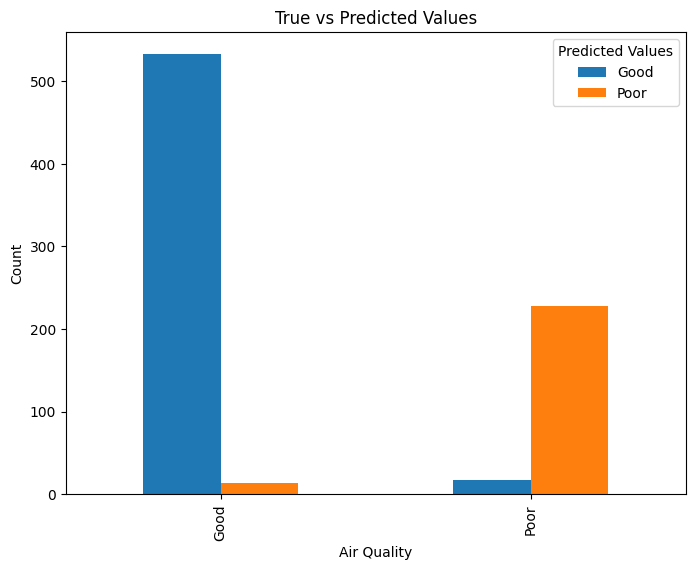

In [73]:
import pandas as pd
# Combine y_test and y_pred into a DataFrame
comparison_df = pd.DataFrame({'True Values': y_test, 'Predicted Values': y_pred})
# Create a grouped bar chart
comparison_df.value_counts().unstack().plot(kind='bar', figsize=(8, 6))
plt.title("True vs Predicted Values")
plt.xlabel("Air Quality")
plt.ylabel("Count")
plt.show()

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Define the model
rf_model = RandomForestClassifier(random_state=42)
# Define the hyperparameters and their possible values
param_grid = {
   'n_estimators': [50, 100, 200],  # Number of trees in the forest
   'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
   'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
   'min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
   'bootstrap': [True, False]  # Whether to use bootstrapping
}
# Set up GridSearchCV
grid_search = GridSearchCV(
   estimator=rf_model,
   param_grid=param_grid,
   cv=5,  # 5-fold cross-validation
   scoring='accuracy',  # Metric to optimize
   verbose=2,  # Print progress
   n_jobs=-1  # Use all available processors
)
# Perform the grid search on training data
grid_search.fit(X_train, y_train)
# Best hyperparameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.9753798695311995
Test Accuracy: 0.9797979797979798


In [76]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

        Good       0.98      0.99      0.99       547
        Poor       0.97      0.96      0.97       245

    accuracy                           0.98       792
   macro avg       0.98      0.98      0.98       792
weighted avg       0.98      0.98      0.98       792

